# Tensorflow - Regression Practice

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

## Creating Data

In [2]:
x_data = np.linspace(0, 10, 1000000)
noise = np.random.randn(len(x_data))

y = mx + b

b = 5

In [3]:
y_true = (0.5 * x_data) + 5 + noise

In [4]:
x_df = pd.DataFrame(data=x_data, columns=["X Data"])
y_df = pd.DataFrame(data=y_true, columns=["Y"])

In [5]:
my_data = pd.concat([x_df, y_df], axis=1)

In [6]:
my_data.head()

,X Data,Y
0,0.00000,6.036674
1,0.00001,4.355363
2,0.00002,5.130974
3,0.00003,4.291577
4,0.00004,5.087821


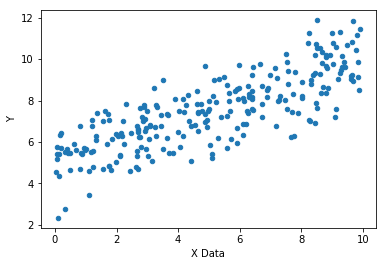

In [9]:
my_data.sample(n=250).plot(kind="scatter", x="X Data", y="Y")

## Tensorflow

In [10]:
batch_size = 8

In [11]:
np.random.randn(2)

array([0.1001349 , 1.81539375])

In [12]:
m = tf.Variable(0.1)
b = tf.Variable(1.8)

In [13]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [14]:
y_model = m*xph + b

In [15]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [17]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_int = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_int], yph:y_true[rand_int]}
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m, b])

In [23]:
model_m, model_b

(0.4664887, 4.9846025)

In [24]:
y_hat = model_m*x_data + model_b

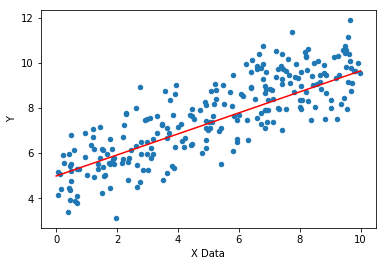

In [25]:
my_data.sample(250).plot(kind="scatter", x="X Data", y="Y")
plt.plot(x_data, y_hat, "r")

## tf.estimator API

In [26]:
feats_cols = [ tf.feature_column.numeric_column("x", shape=[1]) ]

In [27]:
estimator = tf.estimator.LinearRegressor(feats_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmpcy0azg_0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x182adc16d8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [31]:
print(x_train.shape)
print(x_eval.shape)
print(y_train.shape)
print(y_eval.shape)

(700000,)
(300000,)
(700000,)
(300000,)


### Setup Estimator Inputs

In [32]:
inputs_func = tf.estimator.inputs.numpy_input_fn({"x":x_train}, 
                                                 y_train, batch_size=8, num_epochs=None, shuffle=True)

In [33]:
train_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_train}, 
                                                      y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [34]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_eval}, 
                                                      y_eval, batch_size=8, num_epochs=1000, shuffle=False)

### Train the Estimator

In [35]:
estimator.train(input_fn=inputs_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmpcy0azg_0/model.ckpt.
INFO:tensorflow:loss = 461.91214, step = 1
INFO:tensorflow:global_step/sec: 948.27
INFO:tensorflow:loss = 22.799793, step = 101 (0.106 sec)
INFO:tensorflow:global_step/sec: 1271.2
INFO:tensorflow:loss = 9.779369, step = 201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1162.08
INFO:tensorflow:loss = 15.011916, step = 301 (0.085 sec)
INFO:tensorflow:global_step/sec: 1206.42
INFO:tensorflow:loss = 6.352049, step = 401 (0.083 sec)
INFO:tensorflow:global_step/sec: 1105.74
INFO:tensorflow:loss = 15.459538, step = 501 (0.091 sec)
INFO:tensorflow:global_step/sec: 1061.98
INFO:tensorflow:loss = 12.003344, step = 601 (0.094 sec)
INFO:tensorflow:g

### Evaluation

In [36]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-25-07:24:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmpcy0azg_0/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-25-07:24:21
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0972973, global_step = 1000, loss = 8.7783785


In [37]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-25-07:24:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmpcy0azg_0/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-25-07:24:52
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0776603, global_step = 1000, loss = 8.621283


In [38]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.0972973, 'loss': 8.7783785, 'global_step': 1000}
eval metrics: {'average_loss': 1.0776603, 'loss': 8.621283, 'global_step': 1000}


### Predictions

In [39]:
input_func_predict = tf.estimator.inputs.numpy_input_fn({"x":np.linspace(0,10,10)}, shuffle=False)

In [41]:
list(estimator.predict(input_fn=input_func_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmpcy0azg_0/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.435467], dtype=float32)},
 {'predictions': array([5.0996723], dtype=float32)},
 {'predictions': array([5.763878], dtype=float32)},
 {'predictions': array([6.4280834], dtype=float32)},
 {'predictions': array([7.092289], dtype=float32)},
 {'predictions': array([7.7564945], dtype=float32)},
 {'predictions': array([8.4207], dtype=float32)},
 {'predictions': array([9.084906], dtype=float32)},
 {'predictions': array([9.749111], dtype=float32)},
 {'predictions': array([10.413317], dtype=float32)}]

In [42]:
predictions = []

for pred in estimator.predict(input_fn=input_func_predict):
    predictions.append(pred["predictions"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmpcy0azg_0/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [43]:
predictions

[array([4.435467], dtype=float32),
 array([5.0996723], dtype=float32),
 array([5.763878], dtype=float32),
 array([6.4280834], dtype=float32),
 array([7.092289], dtype=float32),
 array([7.7564945], dtype=float32),
 array([8.4207], dtype=float32),
 array([9.084906], dtype=float32),
 array([9.749111], dtype=float32),
 array([10.413317], dtype=float32)]

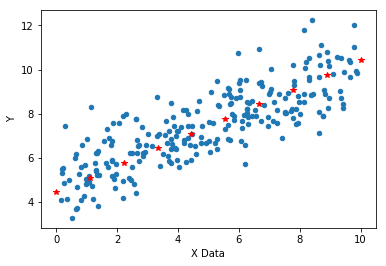

In [44]:
my_data.sample(250).plot(kind="scatter", x="X Data", y="Y")
plt.plot(np.linspace(0,10,10), predictions, "r*")